In [ ]:
file1 = open("yelp_labelled.txt").read() 
file1

In [ ]:
import csv

# Simulate your extracted text


# Split the lines
lines = [line.strip() for line in file1.strip().split('\n') if line.strip()]

# Process into text and boolean label
data = []
for line in lines:
    if line[-1] in {'0', '1'}:
        text = line[:-1].rstrip(" .\t")
        label = bool(int(line[-1]))
        data.append([text, label])

# Write to CSV
with open("mood_writer_dataset_yelp.csv", "w", newline='', encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow(["text", "label"])
    writer.writerows(data)

print("CSV file created as 'mood_writer_dataset_amazon.csv'")


In [ ]:
import pandas as pd

# File paths
file1 = "A:\sentimental_analysis\mood_writer_dataset_amazon.csv"
file2 = "A:\sentimental_analysis\mood_writer_dataset_imdb.csv"
file3 = "A:\sentimental_analysis\mood_writer_dataset_yelp.csv"

# Read each file into a DataFrame
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
df3 = pd.read_csv(file3)

# Concatenate them vertically
merged_df = pd.concat([df1, df2, df3], ignore_index=True)
# Optionally remove duplicates
# merged_df = merged_df.drop_duplicates()

# Save to a new CSV
merged_df.to_csv("merged_output.csv", index=False)

print("Merged CSV saved as 'merged_output.csv'")


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('merged_output.csv')
df.head

<bound method NDFrame.head of                                                    text  label
0     So there is no way for me to plug it in here i...  False
1                            Good case, Excellent value   True
2                                 Great for the jawbone   True
3     Tied to charger for conversations lasting more...  False
4                                      The mic is great   True
...                                                 ...    ...
2995  I think food should have flavor and texture an...  False
2996                            Appetite instantly gone  False
2997  Overall I was not impressed and would not go back  False
2998  The whole experience was underwhelming, and I ...  False
2999  Then, as if I hadn't wasted enough of my life ...  False

[3000 rows x 2 columns]>

In [5]:
df_go = pd.read_csv('go_emotions_dataset.csv')
df_go.head

<bound method NDFrame.head of              id                                               text  \
0       eew5j0j                                    That game hurt.   
1       eemcysk   >sexuality shouldn’t be a grouping category I...   
2       ed2mah1     You do right, if you don't care then fuck 'em!   
3       eeibobj                                 Man I love reddit.   
4       eda6yn6  [NAME] was nowhere near them, he was by the Fa...   
...         ...                                                ...   
211220  ee6pagw                             Everyone likes [NAME].   
211221  ef28nod  Well when you’ve imported about a gazillion of...   
211222  ee8hse1                                 That looks amazing   
211223  edrhoxh  The FDA has plenty to criticize. But like here...   
211224  edze9g4  Desktop link: ^^/r/HelperBot_ ^^Downvote ^^to ...   

        example_very_unclear  admiration  amusement  anger  annoyance  \
0                      False           0          0     

In [6]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download required resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load dataset
df = pd.read_csv('merged_output.csv')  # replace with your actual file name

# Check the first few rows
print(df.head())

# Rename columns if necessary
df.columns = ['text', 'label']  # Ensure the columns are correctly named

# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Preprocessing function
def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and digits
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Join back to string
    return ' '.join(tokens)

# Apply preprocessing
df['cleaned_text'] = df['text'].apply(clean_text)

# Optional: Convert True/False to 1/0
df['label'] = df['label'].astype(int)

# Preview the cleaned dataset
print(df.head())

# Save the cleaned dataset (optional)
df.to_csv('cleaned_sentiment_dataset.csv', index=False)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aravi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aravi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aravi\AppData\Roaming\nltk_data...


                                                text  label
0  So there is no way for me to plug it in here i...  False
1                         Good case, Excellent value   True
2                              Great for the jawbone   True
3  Tied to charger for conversations lasting more...  False
4                                   The mic is great   True


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\aravi/nltk_data'
    - 'c:\\Users\\aravi\\AppData\\Local\\Programs\\Python\\Python312\\nltk_data'
    - 'c:\\Users\\aravi\\AppData\\Local\\Programs\\Python\\Python312\\share\\nltk_data'
    - 'c:\\Users\\aravi\\AppData\\Local\\Programs\\Python\\Python312\\lib\\nltk_data'
    - 'C:\\Users\\aravi\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


Dataset Shape: (3000, 2)

Data Types:
 text     object
label      bool
dtype: object

Null Values:
 text     0
label    0
dtype: int64


C:\Users\aravi\AppData\Local\Temp\ipykernel_7044\3179584766.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Set2')


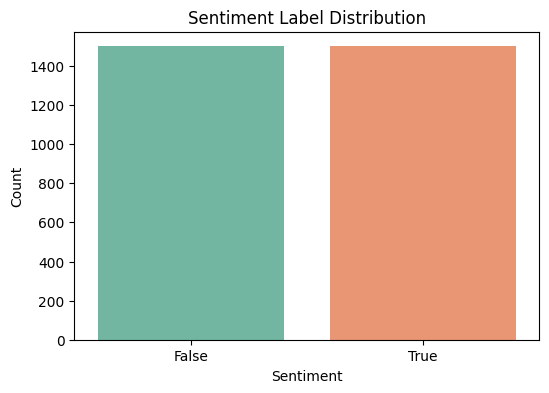

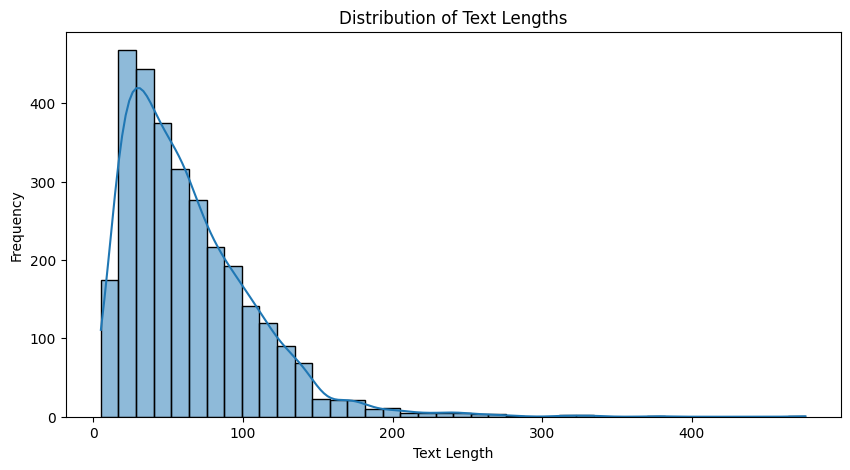

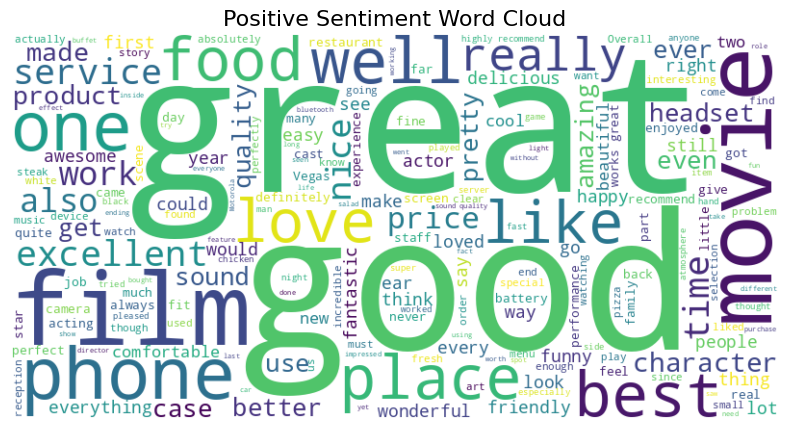

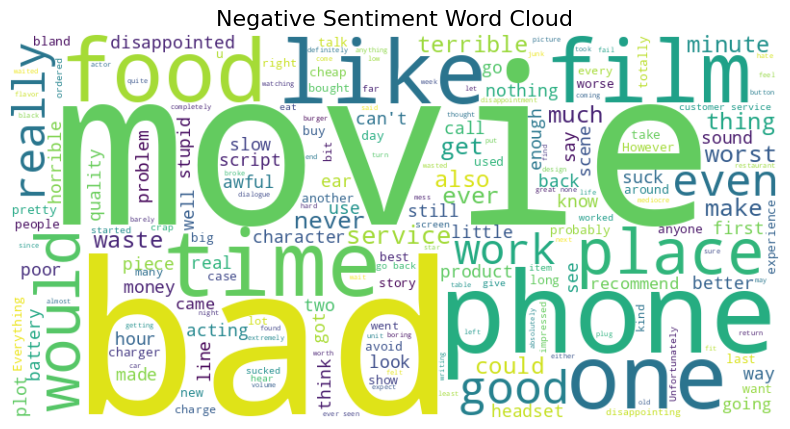

C:\Users\aravi\AppData\Local\Temp\ipykernel_7044\3179584766.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='magma')


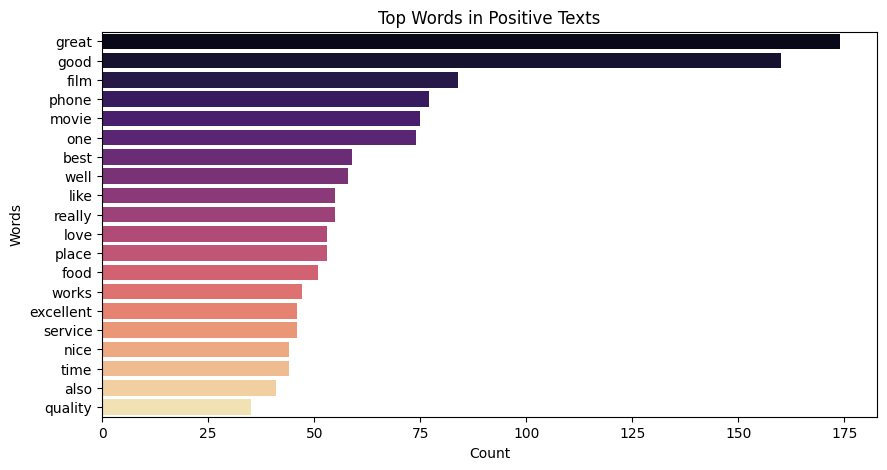

C:\Users\aravi\AppData\Local\Temp\ipykernel_7044\3179584766.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='magma')


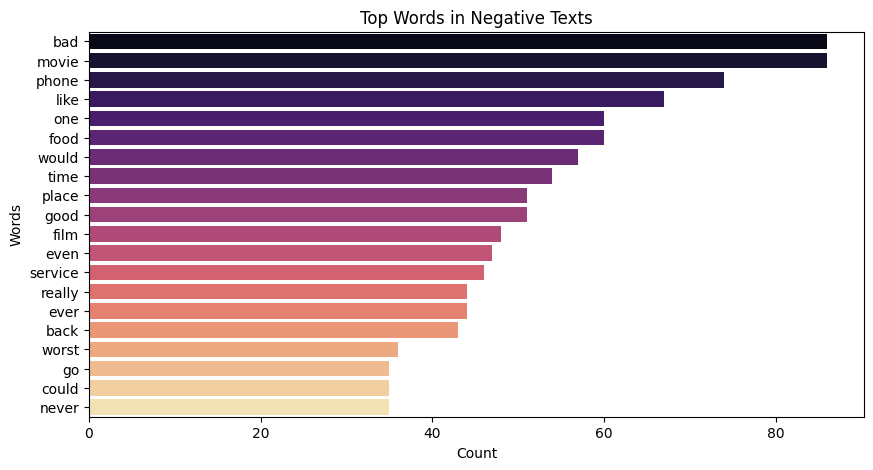

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from collections import Counter

df = pd.read_csv('merged_output.csv')  
df.columns = ['text', 'label']    
# Basic info
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nNull Values:\n", df.isnull().sum())

df['label'] = df['label'].astype(str)

plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df, palette='Set2')
plt.title('Sentiment Label Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

df['text_length'] = df['text'].apply(len)

plt.figure(figsize=(10,5))
sns.histplot(data=df, x='text_length', bins=40, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

stop_words = set(stopwords.words('english'))

def generate_wordcloud(text, title):
    wordcloud = WordCloud(
        width=800, height=400, background_color='white',
        stopwords=stop_words, max_words=200).generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

# Positive
positive_text = df[df['label'] == 'True']['text']
generate_wordcloud(positive_text, "Positive Sentiment Word Cloud")

# Negative
negative_text = df[df['label'] == 'False']['text']
generate_wordcloud(negative_text, "Negative Sentiment Word Cloud")

def get_top_words(series, n=20):
    words = ' '.join(series).lower().split()
    words = [word for word in words if word not in stop_words and word.isalpha()]
    return Counter(words).most_common(n)

def plot_top_words(word_freq, title):
    words, counts = zip(*word_freq)
    plt.figure(figsize=(10,5))
    sns.barplot(x=list(counts), y=list(words), palette='magma')
    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel('Words')
    plt.show()

positive_top = get_top_words(positive_text)
plot_top_words(positive_top, "Top Words in Positive Texts")

negative_top = get_top_words(negative_text)
plot_top_words(negative_top, "Top Words in Negative Texts")
